In [8]:
import response
import map_tree
import region_of_interest
import ROOT
import healpy as hp
import astropy.units as u
import numpy as np

%matplotlib notebook

In [2]:
#r = response.ResponseFile("/home/giacomov/science/hawc/data/response.root")

In [3]:
# %timeit (r.analysis_bins[50][0].psf.integral(0, 10))

# print(r.analysis_bins[50][0].psf.integral(0, 10))

In [19]:
ra_crab, dec_crab = 83.633083, 22.014500

roi = region_of_interest.HealpixConeROI(10.0, ra=ra_crab, dec=dec_crab)

m = map_tree.MapTree("/home/giacomov/science/hawc/data/maptree_1024.root", roi=roi)

In [20]:
m.display()

,Bin,Nside,Scheme,Obs counts,Bkg counts,obs/bkg,Pixels in ROI,Area (deg^2)
0,0,1024,0,9.241053e+09,9.240548e+09,1.000055,95568,313.318809
1,1,1024,0,6.116480e+08,6.115592e+08,1.000145,95568,313.318809
2,2,1024,0,1.960405e+08,1.959964e+08,1.000225,95568,313.318809
3,3,1024,0,5.363777e+07,5.361702e+07,1.000387,95568,313.318809
4,4,1024,0,6.819358e+06,6.810799e+06,1.001257,95568,313.318809
5,5,1024,0,1.505325e+06,1.500394e+06,1.003286,95568,313.318809
6,6,1024,0,2.701610e+05,2.683552e+05,1.006729,95568,313.318809
7,7,1024,0,1.600190e+05,1.589387e+05,1.006797,95568,313.318809
8,8,1024,0,4.290500e+04,4.262135e+04,1.006655,95568,313.318809
9,9,1024,0,6.016300e+04,5.971033e+04,1.007581,95568,313.318809


Total data size: 7.64544 Mbyte


In [ ]:
mymap = m._data_bins_obs[1].to_dense()

idx = (mymap != map_tree.UNSEEN)

for i in range(2, len(m._data_bins_obs)):
    
    mymap[idx] += m._data_bins_obs[i].to_dense()[idx]

mymap_smooth = hp.smoothing(mymap, (0.5 * u.deg).to(u.rad).value, iter=0)

<IPython.core.display.Javascript object>


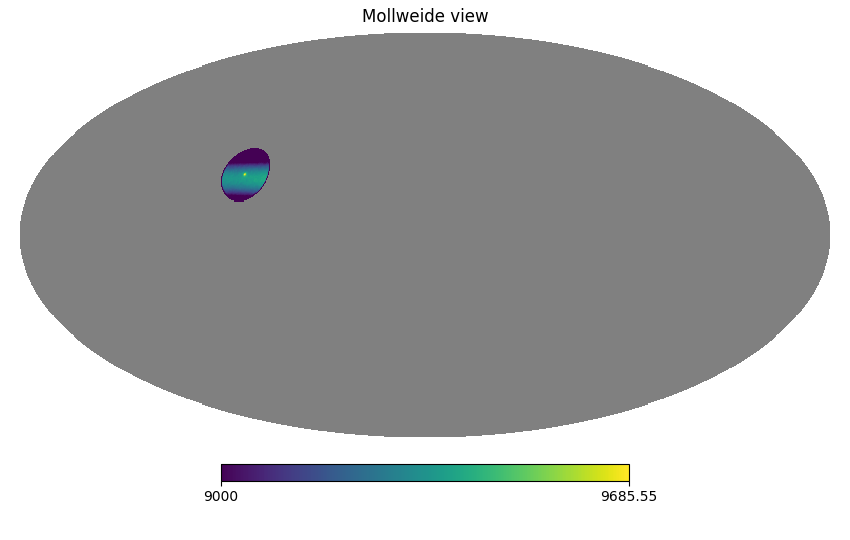

In [27]:
hp.mollview(mymap_smooth, flip='astro', norm='log', min=9000.0)

In [10]:
# 51 s full sky

masked = np.ma.masked_array(mymap, mask=mask)

In [11]:
np.sum(masked)

11210.0

In [30]:
hp.nside2npix(1024) / 1e7

1.2582912

In [32]:
np.sqrt(hp.nside2npix(1024))

3547.2400539010605

In [33]:
4000 * 3000

12000000